<a href="https://colab.research.google.com/github/namoshi/ml_intro/blob/master/poly_sin_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 汎化性（交差確認法によるモデル選択）

サイン関数の多項式回帰

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def y(x, W, M):
    Y = np.array([W[i] * (x ** i) for i in range(M+1)])
    return Y.sum()

#(1.2),(1.122),(1.123)
def E(x, t, M):
    A =np.zeros((M+1, M+1))
    for i in range(M+1):
        for j in range(M+1):
            A[i,j] = (x**(i+j)).sum()

    T = np.array([((x**i)*t).sum() for i in range(M+1)])
    return  np.linalg.solve(A, T)

データの生成（20サンプル）

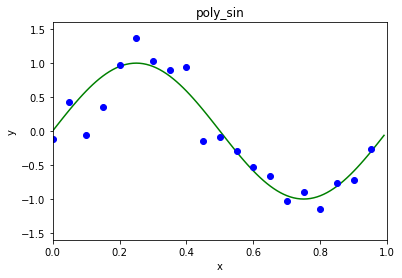

In [3]:
#Sine curve
x_real = np.arange(0, 1, 0.01)
y_real = np.sin(2*np.pi*x_real)

##Training Data
N=20
x_train = np.arange(0, 1, 1.0/N)

#Set "small level of random noise having a Gaussian distribution"
loc = 0
scale = 0.3
y_train =  np.sin(2*np.pi*x_train) + np.random.normal(loc,scale,N)

plt.plot(x_real, y_real, 'g-')
plt.plot(x_train, y_train, 'bo') 
plt.xlim(0.0, 1.0)
plt.ylim(-1.6, 1.6)
plt.title("poly_sin")
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('poly_sin_cv20.eps')
plt.show()
plt.close()

多項式回帰の当てはめ（モデル選択）

[ 1  2  3  4  5  7  8 10 11 12 13 14 15 16 18 19] [ 0  6  9 17]
[0.05 0.1  0.15 0.2  0.25 0.35 0.4  0.5  0.55 0.6  0.65 0.7  0.75 0.8
 0.9  0.95]
[ 0.4216903  -0.05902115  0.34788761  0.97294398  1.36928     0.9040696
  0.93889174 -0.08614094 -0.28725137 -0.52542669 -0.65429487 -1.03438087
 -0.90325455 -1.14677162 -0.72143065 -0.26846168]
W
 [-0.04572945]


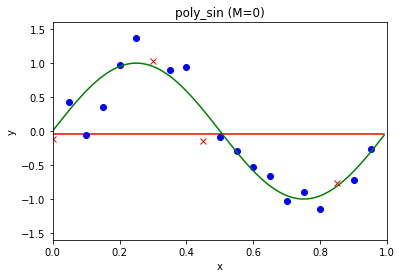

MSE= 0.4256856692280249
[ 0  1  3  4  5  6  7  8  9 10 11 13 14 17 18 19] [ 2 12 15 16]
[0.   0.05 0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.65 0.7  0.85
 0.9  0.95]
[-0.12190632  0.4216903   0.34788761  0.97294398  1.36928     1.03503107
  0.9040696   0.93889174 -0.15099598 -0.08614094 -0.28725137 -0.65429487
 -1.03438087 -0.76532337 -0.72143065 -0.26846168]
W
 [0.11872551]


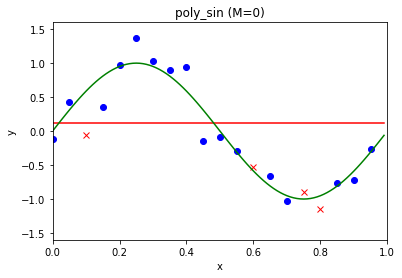

MSE= 0.7731130475784089
[ 0  1  2  4  5  6  7  8  9 11 12 13 15 16 17 19] [ 3 10 14 18]
[0.   0.05 0.1  0.2  0.25 0.3  0.35 0.4  0.45 0.55 0.6  0.65 0.75 0.8
 0.85 0.95]
[-0.12190632  0.4216903  -0.05902115  0.97294398  1.36928     1.03503107
  0.9040696   0.93889174 -0.15099598 -0.28725137 -0.52542669 -0.65429487
 -0.90325455 -1.14677162 -0.76532337 -0.26846168]
W
 [0.04744994]


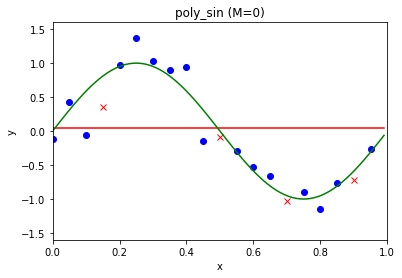

MSE= 0.4674111448615054
[ 0  1  2  3  6  8  9 10 11 12 14 15 16 17 18 19] [ 4  5  7 13]
[0.   0.05 0.1  0.15 0.3  0.4  0.45 0.5  0.55 0.6  0.7  0.75 0.8  0.85
 0.9  0.95]
[-0.12190632  0.4216903  -0.05902115  0.34788761  1.03503107  0.93889174
 -0.15099598 -0.08614094 -0.28725137 -0.52542669 -1.03438087 -0.90325455
 -1.14677162 -0.76532337 -0.72143065 -0.26846168]
W
 [-0.20792903]


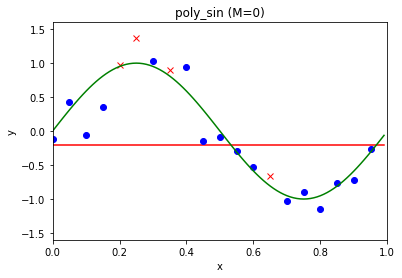

MSE= 1.3294581985790217
[ 0  2  3  4  5  6  7  9 10 12 13 14 15 16 17 18] [ 1  8 11 19]
[0.   0.1  0.15 0.2  0.25 0.3  0.35 0.45 0.5  0.6  0.65 0.7  0.75 0.8
 0.85 0.9 ]
[-0.12190632 -0.05902115  0.34788761  0.97294398  1.36928     1.03503107
  0.9040696  -0.15099598 -0.08614094 -0.52542669 -0.65429487 -1.03438087
 -0.90325455 -1.14677162 -0.76532337 -0.72143065]
W
 [-0.09623342]


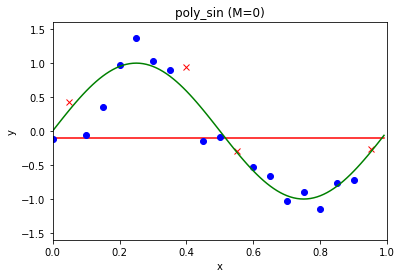

MSE= 0.3514698766141643
CV_MSE[0]=0.669428
[ 0  1  2  3  4  5  8  9 10 11 13 14 15 16 18 19] [ 6  7 12 17]
[0.   0.05 0.1  0.15 0.2  0.25 0.4  0.45 0.5  0.55 0.65 0.7  0.75 0.8
 0.9  0.95]
[-0.12190632  0.4216903  -0.05902115  0.34788761  0.97294398  1.36928
  0.93889174 -0.15099598 -0.08614094 -0.28725137 -0.65429487 -1.03438087
 -0.90325455 -1.14677162 -0.72143065 -0.26846168]
W
 [ 0.64275392 -1.57665933]


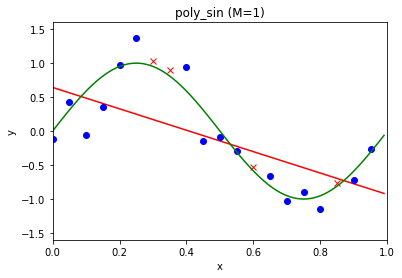

MSE= 0.36597169124742923
[ 0  2  3  4  5  6  7  8  9 11 12 14 15 16 17 18] [ 1 10 13 19]
[0.   0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.55 0.6  0.7  0.75 0.8
 0.85 0.9 ]
[-0.12190632 -0.05902115  0.34788761  0.97294398  1.36928     1.03503107
  0.9040696   0.93889174 -0.15099598 -0.28725137 -0.52542669 -1.03438087
 -0.90325455 -1.14677162 -0.76532337 -0.72143065]
W
 [ 0.93368516 -2.05260151]


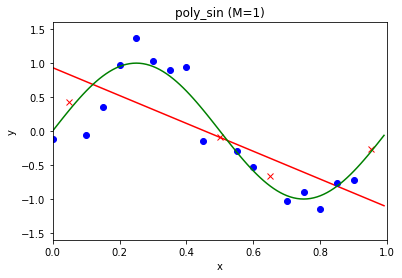

MSE= 0.19781798747583695
[ 0  1  2  3  4  6  7 10 11 12 13 14 16 17 18 19] [ 5  8  9 15]
[0.   0.05 0.1  0.15 0.2  0.3  0.35 0.5  0.55 0.6  0.65 0.7  0.8  0.85
 0.9  0.95]
[-0.12190632  0.4216903  -0.05902115  0.34788761  0.97294398  1.03503107
  0.9040696  -0.08614094 -0.28725137 -0.52542669 -0.65429487 -1.03438087
 -1.14677162 -0.76532337 -0.72143065 -0.26846168]
W
 [ 0.59395059 -1.50222176]


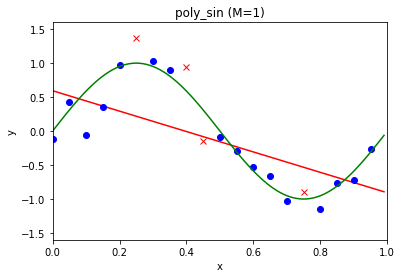

MSE= 0.59029567785424
[ 0  1  3  4  5  6  7  8  9 10 12 13 15 17 18 19] [ 2 11 14 16]
[0.   0.05 0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.6  0.65 0.75 0.85
 0.9  0.95]
[-0.12190632  0.4216903   0.34788761  0.97294398  1.36928     1.03503107
  0.9040696   0.93889174 -0.15099598 -0.08614094 -0.52542669 -0.65429487
 -0.90325455 -0.76532337 -0.72143065 -0.26846168]
W
 [ 0.88934411 -1.69210158]


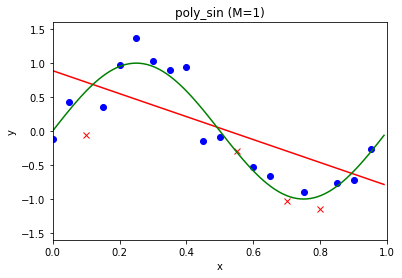

MSE= 0.41994551967807814
[ 1  2  5  6  7  8  9 10 11 12 13 14 15 16 17 19] [ 0  3  4 18]
[0.05 0.1  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8
 0.85 0.95]
[ 0.4216903  -0.05902115  1.36928     1.03503107  0.9040696   0.93889174
 -0.15099598 -0.08614094 -0.28725137 -0.52542669 -0.65429487 -1.03438087
 -0.90325455 -1.14677162 -0.76532337 -0.26846168]
W
 [ 1.03009223 -2.1447074 ]


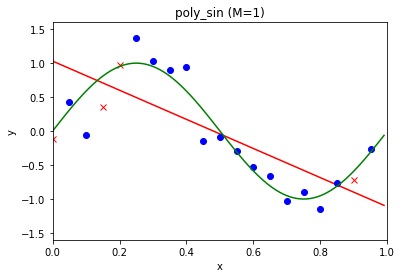

MSE= 0.40680716029208286
CV_MSE[1]=0.396168
[ 0  1  3  4  5  7  8  9 10 11 13 14 15 16 17 19] [ 2  6 12 18]
[0.   0.05 0.15 0.2  0.25 0.35 0.4  0.45 0.5  0.55 0.65 0.7  0.75 0.8
 0.85 0.95]
[-0.12190632  0.4216903   0.34788761  0.97294398  1.36928     0.9040696
  0.93889174 -0.15099598 -0.08614094 -0.28725137 -0.65429487 -1.03438087
 -0.90325455 -1.14677162 -0.76532337 -0.26846168]
W
 [ 0.5659886   0.08377896 -2.07065363]


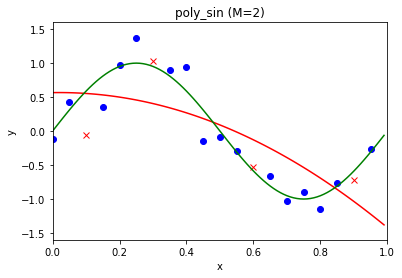

MSE= 0.25712011849460087
[ 0  2  3  5  6  7  8 10 11 12 14 15 16 17 18 19] [ 1  4  9 13]
[0.   0.1  0.15 0.25 0.3  0.35 0.4  0.5  0.55 0.6  0.7  0.75 0.8  0.85
 0.9  0.95]
[-0.12190632 -0.05902115  0.34788761  1.36928     1.03503107  0.9040696
  0.93889174 -0.08614094 -0.28725137 -0.52542669 -1.03438087 -0.90325455
 -1.14677162 -0.76532337 -0.72143065 -0.26846168]
W
 [ 0.37163757  0.9151131  -2.67427729]


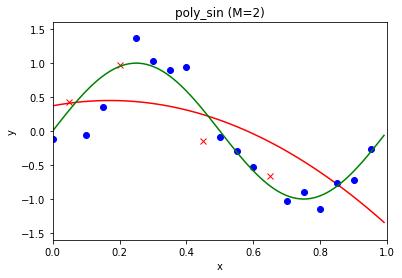

MSE= 0.1678338876118027
[ 0  1  2  3  4  5  6  9 10 11 12 13 14 16 17 18] [ 7  8 15 19]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.45 0.5  0.55 0.6  0.65 0.7  0.8
 0.85 0.9 ]
[-0.12190632  0.4216903  -0.05902115  0.34788761  0.97294398  1.36928
  1.03503107 -0.15099598 -0.08614094 -0.28725137 -0.52542669 -0.65429487
 -1.03438087 -1.14677162 -0.76532337 -0.72143065]
W
 [ 0.37917327  0.78526357 -2.93822504]


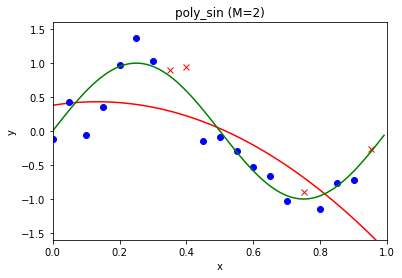

MSE= 0.6287489711445986
[ 1  2  3  4  5  6  7  8  9 12 13 14 15 17 18 19] [ 0 10 11 16]
[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.6  0.65 0.7  0.75 0.85
 0.9  0.95]
[ 0.4216903  -0.05902115  0.34788761  0.97294398  1.36928     1.03503107
  0.9040696   0.93889174 -0.15099598 -0.52542669 -0.65429487 -1.03438087
 -0.90325455 -0.76532337 -0.72143065 -0.26846168]
W
 [ 0.78333424 -0.70783801 -1.2465996 ]


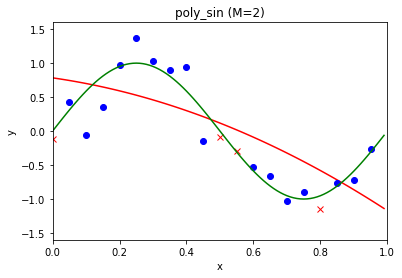

MSE= 0.31848297989232627
[ 0  1  2  4  6  7  8  9 10 11 12 13 15 16 18 19] [ 3  5 14 17]
[0.   0.05 0.1  0.2  0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.75 0.8
 0.9  0.95]
[-0.12190632  0.4216903  -0.05902115  0.97294398  1.03503107  0.9040696
  0.93889174 -0.15099598 -0.08614094 -0.28725137 -0.52542669 -0.65429487
 -0.90325455 -1.14677162 -0.72143065 -0.26846168]
W
 [ 0.38826398  0.42043397 -2.05819155]


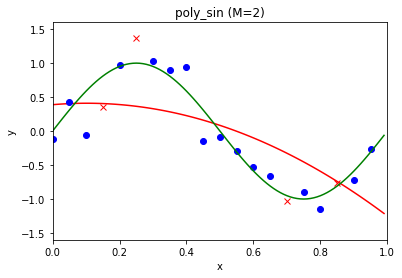

MSE= 0.3787063430464227
CV_MSE[2]=0.350178
[ 0  1  3  4  5  6  7  8  9 13 14 15 16 17 18 19] [ 2 10 11 12]
[0.   0.05 0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[-0.12190632  0.4216903   0.34788761  0.97294398  1.36928     1.03503107
  0.9040696   0.93889174 -0.15099598 -0.65429487 -1.03438087 -0.90325455
 -1.14677162 -0.76532337 -0.72143065 -0.26846168]
W
 [ -0.2253493   12.66169468 -36.42510489  24.23083517]


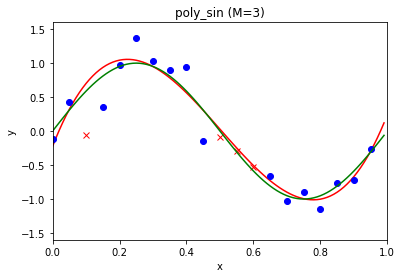

MSE= 0.14804703043605835
[ 0  2  3  5  6  7  8  9 10 11 12 13 15 17 18 19] [ 1  4 14 16]
[0.   0.1  0.15 0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.75 0.85
 0.9  0.95]
[-0.12190632 -0.05902115  0.34788761  1.36928     1.03503107  0.9040696
  0.93889174 -0.15099598 -0.08614094 -0.28725137 -0.52542669 -0.65429487
 -0.90325455 -0.76532337 -0.72143065 -0.26846168]
W
 [ -0.48378654  13.11168686 -35.8255656   23.39963851]


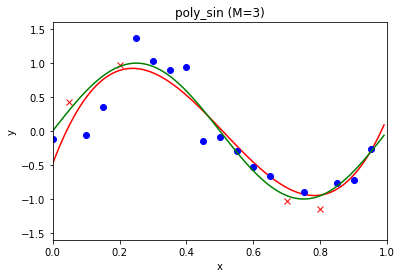

MSE= 0.05041855049610907
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 16 17] [13 15 18 19]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.7
 0.8  0.85]
[-0.12190632  0.4216903  -0.05902115  0.34788761  0.97294398  1.36928
  1.03503107  0.9040696   0.93889174 -0.15099598 -0.08614094 -0.28725137
 -0.52542669 -1.03438087 -1.14677162 -0.76532337]
W
 [ -0.39056726  13.15483429 -36.99090707  24.4345202 ]


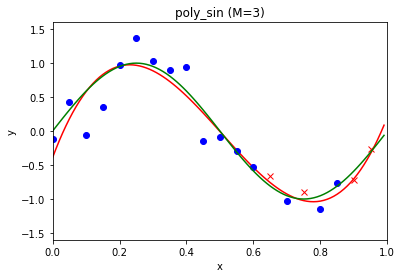

MSE= 0.0073136733256118445
[ 1  2  4  5  6  7  9 10 11 12 13 14 15 16 18 19] [ 0  3  8 17]
[0.05 0.1  0.2  0.25 0.3  0.35 0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8
 0.9  0.95]
[ 0.4216903  -0.05902115  0.97294398  1.36928     1.03503107  0.9040696
 -0.15099598 -0.08614094 -0.28725137 -0.52542669 -0.65429487 -1.03438087
 -0.90325455 -1.14677162 -0.72143065 -0.26846168]
W
 [ -0.54841507  14.68440564 -40.57040174  26.75608386]


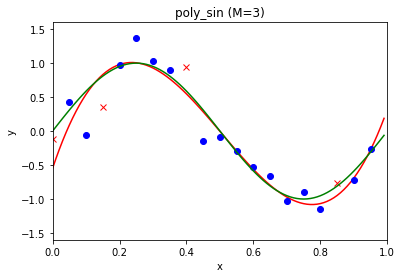

MSE= 0.1507678478642666
[ 0  1  2  3  4  8 10 11 12 13 14 15 16 17 18 19] [5 6 7 9]
[0.   0.05 0.1  0.15 0.2  0.4  0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[-0.12190632  0.4216903  -0.05902115  0.34788761  0.97294398  0.93889174
 -0.08614094 -0.28725137 -0.52542669 -0.65429487 -1.03438087 -0.90325455
 -1.14677162 -0.76532337 -0.72143065 -0.26846168]
W
 [ -0.3347464   11.24591594 -31.73072091  20.89434301]


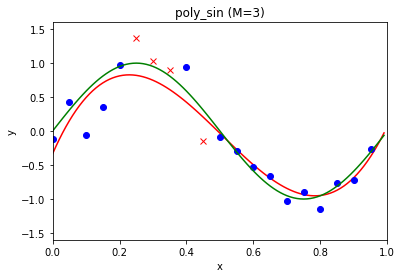

MSE= 0.14927875915662606
CV_MSE[3]=0.101165
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 16 18 19] [ 2 14 15 17]
[0.   0.05 0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.8
 0.9  0.95]
[-0.12190632  0.4216903   0.34788761  0.97294398  1.36928     1.03503107
  0.9040696   0.93889174 -0.15099598 -0.08614094 -0.28725137 -0.52542669
 -0.65429487 -1.14677162 -0.72143065 -0.26846168]
W
 [ -0.14855266  10.07401162 -22.61552307  -0.03785848  13.23976625]


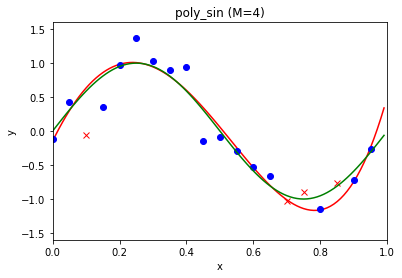

MSE= 0.15282735461373465
[ 1  2  3  4  6  7  8  9 10 11 13 14 15 17 18 19] [ 0  5 12 16]
[0.05 0.1  0.15 0.2  0.3  0.35 0.4  0.45 0.5  0.55 0.65 0.7  0.75 0.85
 0.9  0.95]
[ 0.4216903  -0.05902115  0.34788761  0.97294398  1.03503107  0.9040696
  0.93889174 -0.15099598 -0.08614094 -0.28725137 -0.65429487 -1.03438087
 -0.90325455 -0.76532337 -0.72143065 -0.26846168]
W
 [ -0.42947892  10.57542281 -22.87721407   1.56899308  11.63286241]


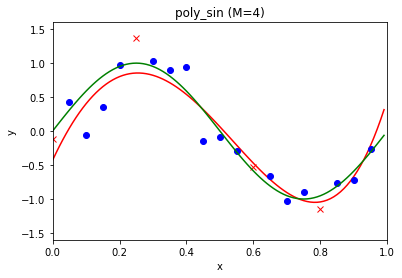

MSE= 0.0932947298922138
[ 0  1  2  3  4  5  8  9 11 12 13 14 15 16 17 19] [ 6  7 10 18]
[0.   0.05 0.1  0.15 0.2  0.25 0.4  0.45 0.55 0.6  0.65 0.7  0.75 0.8
 0.85 0.95]
[-0.12190632  0.4216903  -0.05902115  0.34788761  0.97294398  1.36928
  0.93889174 -0.15099598 -0.28725137 -0.52542669 -0.65429487 -1.03438087
 -0.90325455 -1.14677162 -0.76532337 -0.26846168]
W
 [ -0.2226252    8.62117881 -15.96750145  -8.3986385   16.53650078]


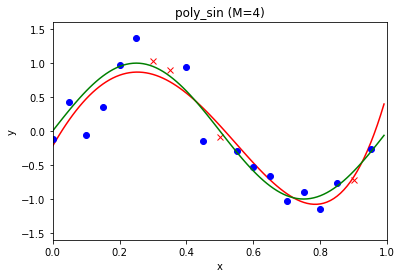

MSE= 0.02551173187766921
[ 0  2  5  6  7  8  9 10 12 13 14 15 16 17 18 19] [ 1  3  4 11]
[0.   0.1  0.25 0.3  0.35 0.4  0.45 0.5  0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[-0.12190632 -0.05902115  1.36928     1.03503107  0.9040696   0.93889174
 -0.15099598 -0.08614094 -0.52542669 -0.65429487 -1.03438087 -0.90325455
 -1.14677162 -0.76532337 -0.72143065 -0.26846168]
W
 [ -0.35376783  11.39033966 -26.20055497   5.05202889  10.61739779]


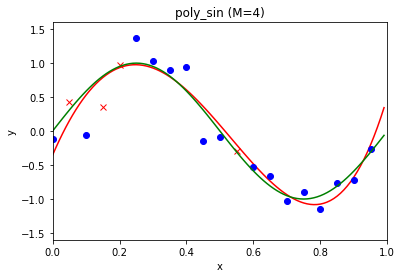

MSE= 0.06885791634330594
[ 0  1  2  3  4  5  6  7 10 11 12 14 15 16 17 18] [ 8  9 13 19]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.5  0.55 0.6  0.7  0.75 0.8
 0.85 0.9 ]
[-0.12190632  0.4216903  -0.05902115  0.34788761  0.97294398  1.36928
  1.03503107  0.9040696  -0.08614094 -0.28725137 -0.52542669 -1.03438087
 -0.90325455 -1.14677162 -0.76532337 -0.72143065]
W
 [ -0.21129389   7.72766912  -7.94721822 -25.91113367  27.48705411]


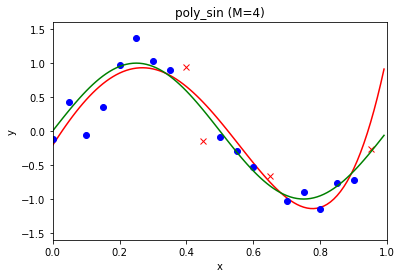

MSE= 0.1450013277093623
CV_MSE[4]=0.097099
[ 0  1  2  4  6  9 10 11 12 13 14 15 16 17 18 19] [3 5 7 8]
[0.   0.05 0.1  0.2  0.3  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[-0.12190632  0.4216903  -0.05902115  0.97294398  1.03503107 -0.15099598
 -0.08614094 -0.28725137 -0.52542669 -0.65429487 -1.03438087 -0.90325455
 -1.14677162 -0.76532337 -0.72143065 -0.26846168]
W
 [-1.02488755e-01  4.53702861e+00  1.46314339e+01 -1.01427097e+02
  1.35310947e+02 -5.29812401e+01]


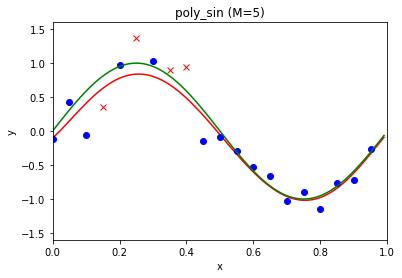

MSE= 0.15456907397422878
[ 1  2  3  5  6  7  8 10 11 12 13 15 16 17 18 19] [ 0  4  9 14]
[0.05 0.1  0.15 0.25 0.3  0.35 0.4  0.5  0.55 0.6  0.65 0.75 0.8  0.85
 0.9  0.95]
[ 0.4216903  -0.05902115  0.34788761  1.36928     1.03503107  0.9040696
  0.93889174 -0.08614094 -0.28725137 -0.52542669 -0.65429487 -0.90325455
 -1.14677162 -0.76532337 -0.72143065 -0.26846168]
W
 [   0.65729119  -14.39155555  138.47939795 -408.63629445  458.75869666
 -175.30850403]


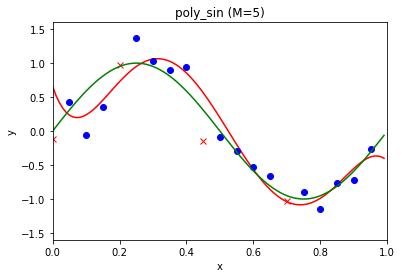

MSE= 0.2944485385176452
[ 0  1  2  3  4  5  6  7  8  9 11 12 14 15 16 18] [10 13 17 19]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.55 0.6  0.7  0.75
 0.8  0.9 ]
[-0.12190632  0.4216903  -0.05902115  0.34788761  0.97294398  1.36928
  1.03503107  0.9040696   0.93889174 -0.15099598 -0.28725137 -0.52542669
 -1.03438087 -0.90325455 -1.14677162 -0.72143065]
W
 [-2.41170886e-02 -2.42098340e+00  8.14724065e+01 -3.05838665e+02
  3.85818188e+02 -1.60433975e+02]


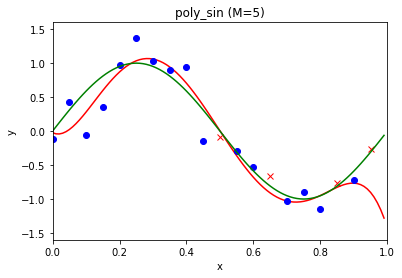

MSE= 0.12008467729407976
[ 0  3  4  5  6  7  8  9 10 11 13 14 16 17 18 19] [ 1  2 12 15]
[0.   0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.65 0.7  0.8  0.85
 0.9  0.95]
[-0.12190632  0.34788761  0.97294398  1.36928     1.03503107  0.9040696
  0.93889174 -0.15099598 -0.08614094 -0.28725137 -0.65429487 -1.03438087
 -1.14677162 -0.76532337 -0.72143065 -0.26846168]
W
 [-1.65023276e-01  2.32182158e+00  4.63431219e+01 -2.04272655e+02
  2.59426094e+02 -1.03884694e+02]


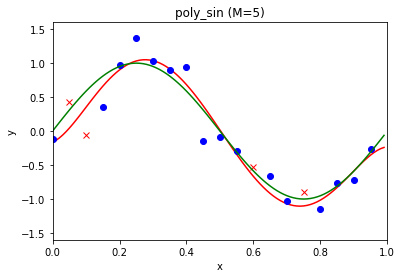

MSE= 0.09281588047899827
[ 0  1  2  3  4  5  7  8  9 10 12 13 14 15 17 19] [ 6 11 16 18]
[0.   0.05 0.1  0.15 0.2  0.25 0.35 0.4  0.45 0.5  0.6  0.65 0.7  0.75
 0.85 0.95]
[-0.12190632  0.4216903  -0.05902115  0.34788761  0.97294398  1.36928
  0.9040696   0.93889174 -0.15099598 -0.08614094 -0.52542669 -0.65429487
 -1.03438087 -0.90325455 -0.76532337 -0.26846168]
W
 [-4.73404897e-02 -1.03068732e+00  6.90248994e+01 -2.67168090e+02
  3.36097424e+02 -1.37345091e+02]


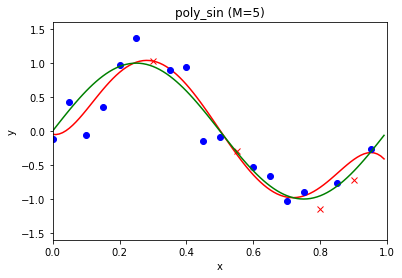

MSE= 0.04956844111093915
CV_MSE[5]=0.142297
[ 0  1  2  3  4  5  6  7  8  9 10 14 15 16 17 18] [11 12 13 19]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.7  0.75 0.8
 0.85 0.9 ]
[-0.12190632  0.4216903  -0.05902115  0.34788761  0.97294398  1.36928
  1.03503107  0.9040696   0.93889174 -0.15099598 -0.08614094 -1.03438087
 -0.90325455 -1.14677162 -0.76532337 -0.72143065]
W
 [ 3.65759878e-02 -7.84495811e+00  1.46719597e+02 -5.86426313e+02
  9.23607181e+02 -6.34668967e+02  1.57572834e+02]


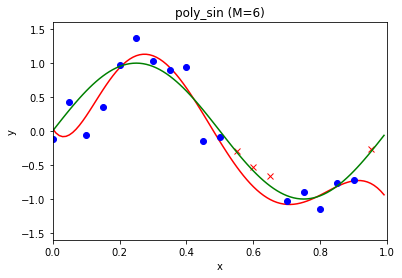

MSE= 0.12990750777401
[ 0  1  2  4  5  6  8  9 10 11 12 13 16 17 18 19] [ 3  7 14 15]
[0.   0.05 0.1  0.2  0.25 0.3  0.4  0.45 0.5  0.55 0.6  0.65 0.8  0.85
 0.9  0.95]
[-0.12190632  0.4216903  -0.05902115  0.97294398  1.36928     1.03503107
  0.93889174 -0.15099598 -0.08614094 -0.28725137 -0.52542669 -0.65429487
 -1.14677162 -0.76532337 -0.72143065 -0.26846168]
W
 [ 3.15112452e-03 -6.12534981e+00  1.51174979e+02 -6.89049852e+02
  1.27062621e+03 -1.07068156e+03  3.44770595e+02]


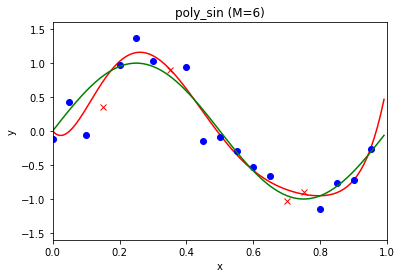

MSE= 0.043291195364253486
[ 0  2  3  5  6  7 10 11 12 13 14 15 16 17 18 19] [1 4 8 9]
[0.   0.1  0.15 0.25 0.3  0.35 0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[-0.12190632 -0.05902115  0.34788761  1.36928     1.03503107  0.9040696
 -0.08614094 -0.28725137 -0.52542669 -0.65429487 -1.03438087 -0.90325455
 -1.14677162 -0.76532337 -0.72143065 -0.26846168]
W
 [-1.30376181e-01 -1.43836741e+01  2.31472666e+02 -9.61213119e+02
  1.70269825e+03 -1.39954919e+03  4.41923372e+02]


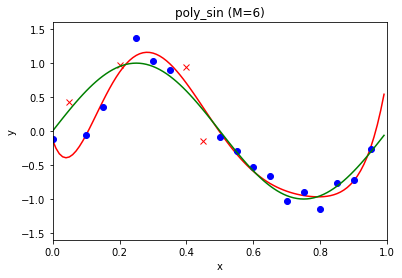

MSE= 0.23933806007761377
[ 1  3  4  5  7  8  9 11 12 13 14 15 16 17 18 19] [ 0  2  6 10]
[0.05 0.15 0.2  0.25 0.35 0.4  0.45 0.55 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[ 0.4216903   0.34788761  0.97294398  1.36928     0.9040696   0.93889174
 -0.15099598 -0.28725137 -0.52542669 -0.65429487 -1.03438087 -0.90325455
 -1.14677162 -0.76532337 -0.72143065 -0.26846168]
W
 [ 1.86468717e+00 -4.85245708e+01  4.59916322e+02 -1.69938731e+03
  2.92004239e+03 -2.38480728e+03  7.52124679e+02]


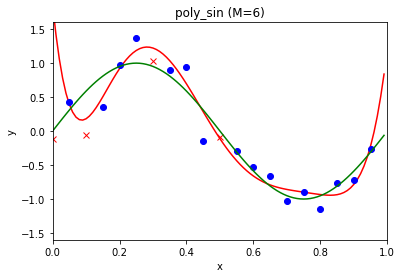

MSE= 1.0099340740184761
[ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 19] [ 5 16 17 18]
[0.   0.05 0.1  0.15 0.2  0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.95]
[-0.12190632  0.4216903  -0.05902115  0.34788761  0.97294398  1.03503107
  0.9040696   0.93889174 -0.15099598 -0.08614094 -0.28725137 -0.52542669
 -0.65429487 -1.03438087 -0.90325455 -0.26846168]
W
 [ 2.03783573e-02 -5.40787272e+00  1.14296641e+02 -4.63565249e+02
  7.40457829e+02 -5.26171424e+02  1.40358451e+02]


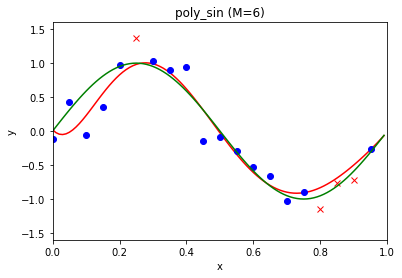

MSE= 0.07634033355183734
CV_MSE[6]=0.299762
[ 0  1  3  4  5  6  7  8  9 10 11 12 14 15 17 19] [ 2 13 16 18]
[0.   0.05 0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.7  0.75
 0.85 0.95]
[-0.12190632  0.4216903   0.34788761  0.97294398  1.36928     1.03503107
  0.9040696   0.93889174 -0.15099598 -0.08614094 -0.28725137 -0.52542669
 -1.03438087 -0.90325455 -0.76532337 -0.26846168]
W
 [-5.26812407e-02  7.53786826e+00 -6.02327662e+01  5.29424072e+02
 -2.12297446e+03  3.83455156e+03 -3.19667572e+03  1.00954295e+03]


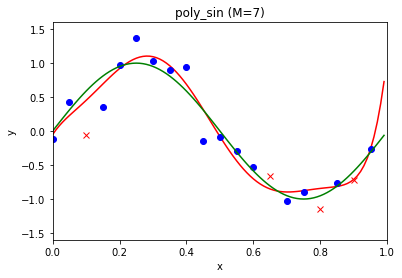

MSE= 0.09793428909277983
[ 2  3  4  5  6  7  9 10 11 12 13 14 16 17 18 19] [ 0  1  8 15]
[0.1  0.15 0.2  0.25 0.3  0.35 0.45 0.5  0.55 0.6  0.65 0.7  0.8  0.85
 0.9  0.95]
[-0.05902115  0.34788761  0.97294398  1.36928     1.03503107  0.9040696
 -0.15099598 -0.08614094 -0.28725137 -0.52542669 -0.65429487 -1.03438087
 -1.14677162 -0.76532337 -0.72143065 -0.26846168]
W
 [ 5.48432250e+00 -1.55073952e+02  1.54551348e+03 -6.93757261e+03
  1.62601642e+04 -2.07865194e+04  1.37395461e+04 -3.67275487e+03]


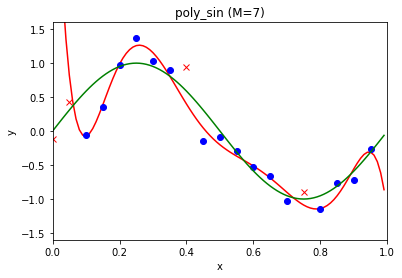

MSE= 7.979302678209869
[ 0  1  2  3  4  7  8  9 10 12 13 14 15 16 18 19] [ 5  6 11 17]
[0.   0.05 0.1  0.15 0.2  0.35 0.4  0.45 0.5  0.6  0.65 0.7  0.75 0.8
 0.9  0.95]
[-0.12190632  0.4216903  -0.05902115  0.34788761  0.97294398  0.9040696
  0.93889174 -0.15099598 -0.08614094 -0.52542669 -0.65429487 -1.03438087
 -0.90325455 -1.14677162 -0.72143065 -0.26846168]
W
 [-1.68052446e-02  7.86048385e-01  5.75363401e+00  2.38853919e+02
 -1.44147539e+03  2.97857169e+03 -2.66422880e+03  8.83319139e+02]


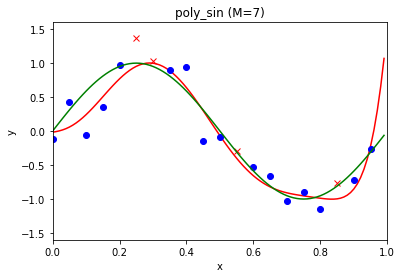

MSE= 0.06039070522414086
[ 0  1  2  3  5  6  7  8  9 11 12 13 15 16 17 18] [ 4 10 14 19]
[0.   0.05 0.1  0.15 0.25 0.3  0.35 0.4  0.45 0.55 0.6  0.65 0.75 0.8
 0.85 0.9 ]
[-0.12190632  0.4216903  -0.05902115  0.34788761  1.36928     1.03503107
  0.9040696   0.93889174 -0.15099598 -0.28725137 -0.52542669 -0.65429487
 -0.90325455 -1.14677162 -0.76532337 -0.72143065]
W
 [-1.74332085e-02  2.46852730e+00 -4.43039146e+01  6.94826009e+02
 -3.20200594e+03  6.26276253e+03 -5.59615773e+03  1.88853219e+03]


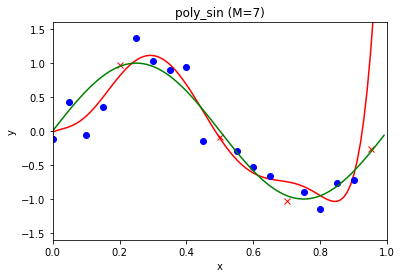

MSE= 0.5409590305693996
[ 0  1  2  4  5  6  8 10 11 13 14 15 16 17 18 19] [ 3  7  9 12]
[0.   0.05 0.1  0.2  0.25 0.3  0.4  0.5  0.55 0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[-0.12190632  0.4216903  -0.05902115  0.97294398  1.36928     1.03503107
  0.93889174 -0.08614094 -0.28725137 -0.65429487 -1.03438087 -0.90325455
 -1.14677162 -0.76532337 -0.72143065 -0.26846168]
W
 [-3.30212985e-02  1.70676380e+00  3.05455651e+00  2.60091656e+02
 -1.49700337e+03  2.99505686e+03 -2.59718609e+03  8.35385526e+02]


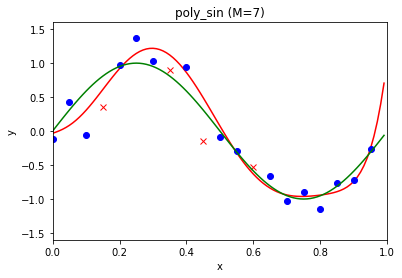

MSE= 0.13466989495970014
CV_MSE[7]=1.762651
[ 0  3  4  5  6  7  8  9 10 11 13 14 15 16 17 19] [ 1  2 12 18]
[0.   0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.65 0.7  0.75 0.8
 0.85 0.95]
[-0.12190632  0.34788761  0.97294398  1.36928     1.03503107  0.9040696
  0.93889174 -0.15099598 -0.08614094 -0.28725137 -0.65429487 -1.03438087
 -0.90325455 -1.14677162 -0.76532337 -0.26846168]
W
 [-1.22345969e-01 -2.60267437e+01  3.34689978e+02 -9.39663444e+02
 -9.18089449e+02  8.63951896e+03 -1.60411903e+04  1.27699424e+04
 -3.82128272e+03]


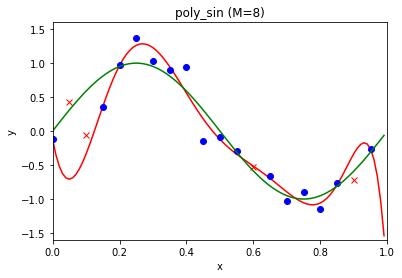

MSE= 0.376582904569769
[ 1  2  3  4  5  7  8 10 11 12 14 15 16 17 18 19] [ 0  6  9 13]
[0.05 0.1  0.15 0.2  0.25 0.35 0.4  0.5  0.55 0.6  0.7  0.75 0.8  0.85
 0.9  0.95]
[ 0.4216903  -0.05902115  0.34788761  0.97294398  1.36928     0.9040696
  0.93889174 -0.08614094 -0.28725137 -0.52542669 -1.03438087 -0.90325455
 -1.14677162 -0.76532337 -0.72143065 -0.26846168]
W
 [ 3.94085022e+00 -1.20756579e+02  1.28079081e+03 -6.16423730e+03
  1.63045976e+04 -2.56184775e+04  2.39302646e+04 -1.22928854e+04
  2.67730588e+03]


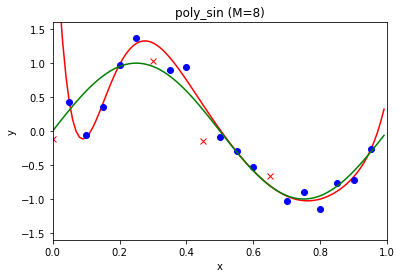

MSE= 4.220037508531968
[ 0  1  2  3  5  6  7  9 10 11 12 13 16 17 18 19] [ 4  8 14 15]
[0.   0.05 0.1  0.15 0.25 0.3  0.35 0.45 0.5  0.55 0.6  0.65 0.8  0.85
 0.9  0.95]
[-0.12190632  0.4216903  -0.05902115  0.34788761  1.36928     1.03503107
  0.9040696  -0.15099598 -0.08614094 -0.28725137 -0.52542669 -0.65429487
 -1.14677162 -0.76532337 -0.72143065 -0.26846168]
W
 [-7.45676734e-02  2.15484192e+01 -4.97744325e+02  4.68036934e+03
 -2.03966219e+04  4.65257072e+04 -5.77594193e+04  3.70307692e+04
 -9.60678713e+03]


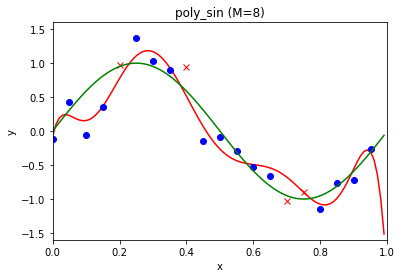

MSE= 0.0869991527851479
[ 0  1  2  4  6  7  8  9 10 12 13 14 15 16 18 19] [ 3  5 11 17]
[0.   0.05 0.1  0.2  0.3  0.35 0.4  0.45 0.5  0.6  0.65 0.7  0.75 0.8
 0.9  0.95]
[-0.12190632  0.4216903  -0.05902115  0.97294398  1.03503107  0.9040696
  0.93889174 -0.15099598 -0.08614094 -0.52542669 -0.65429487 -1.03438087
 -0.90325455 -1.14677162 -0.72143065 -0.26846168]
W
 [-8.32054544e-02  2.09805047e+01 -4.58136843e+02  4.18433961e+03
 -1.78149340e+04  3.97950965e+04 -4.84850815e+04  3.05663486e+04
 -7.80975295e+03]


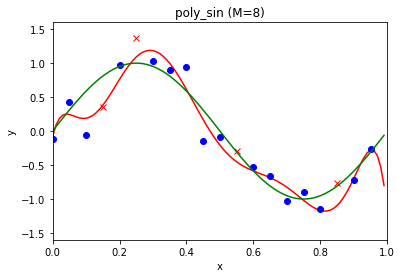

MSE= 0.053654031148817914
[ 0  1  2  3  4  5  6  8  9 11 12 13 14 15 17 18] [ 7 10 16 19]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.4  0.45 0.55 0.6  0.65 0.7  0.75
 0.85 0.9 ]
[-0.12190632  0.4216903  -0.05902115  0.34788761  0.97294398  1.36928
  1.03503107  0.93889174 -0.15099598 -0.28725137 -0.52542669 -0.65429487
 -1.03438087 -0.90325455 -0.76532337 -0.72143065]
W
 [-9.35722676e-02  2.92560221e+01 -6.94018269e+02  6.51772560e+03
 -2.86947143e+04  6.68535030e+04 -8.54598339e+04  5.67657180e+04
 -1.53321056e+04]


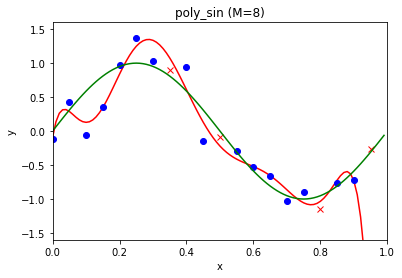

MSE= 2.497814955102385
CV_MSE[8]=1.447018
[ 0  1  4  5  7  8  9 11 12 13 14 15 16 17 18 19] [ 2  3  6 10]
[0.   0.05 0.2  0.25 0.35 0.4  0.45 0.55 0.6  0.65 0.7  0.75 0.8  0.85
 0.9  0.95]
[-0.12190632  0.4216903   0.97294398  1.36928     0.9040696   0.93889174
 -0.15099598 -0.28725137 -0.52542669 -0.65429487 -1.03438087 -0.90325455
 -1.14677162 -0.76532337 -0.72143065 -0.26846168]
W
 [-1.22998472e-01  4.71152251e+01 -1.19322608e+03  1.19754642e+04
 -5.89705253e+04  1.62023990e+05 -2.62337570e+05  2.49310218e+05
 -1.28795210e+05  2.79417449e+04]


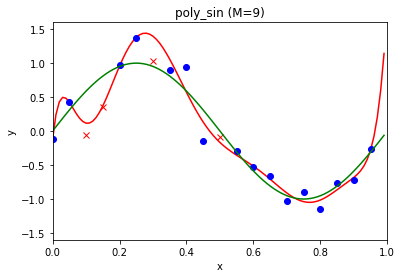

MSE= 0.041972997324341406
[ 0  1  2  3  5  6  7 10 11 12 13 14 15 16 17 18] [ 4  8  9 19]
[0.   0.05 0.1  0.15 0.25 0.3  0.35 0.5  0.55 0.6  0.65 0.7  0.75 0.8
 0.85 0.9 ]
[-0.12190632  0.4216903  -0.05902115  0.34788761  1.36928     1.03503107
  0.9040696  -0.08614094 -0.28725137 -0.52542669 -0.65429487 -1.03438087
 -0.90325455 -1.14677162 -0.76532337 -0.72143065]
W
 [-1.12885351e-01  4.88236648e+01 -1.31726807e+03  1.37873727e+04
 -7.07996525e+04  2.03041020e+05 -3.43071380e+05  3.39910566e+05
 -1.82836087e+05  4.12429998e+04]


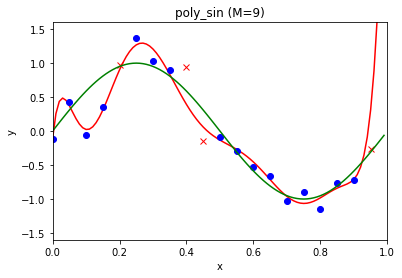

MSE= 0.17129408995827022
[ 0  2  3  4  5  6  8  9 10 12 13 14 15 16 18 19] [ 1  7 11 17]
[0.   0.1  0.15 0.2  0.25 0.3  0.4  0.45 0.5  0.6  0.65 0.7  0.75 0.8
 0.9  0.95]
[-0.12190632 -0.05902115  0.34788761  0.97294398  1.36928     1.03503107
  0.93889174 -0.15099598 -0.08614094 -0.52542669 -0.65429487 -1.03438087
 -0.90325455 -1.14677162 -0.72143065 -0.26846168]
W
 [-1.21387874e-01  3.03691213e-01 -1.47024185e+02  2.64773747e+03
 -1.53360841e+04  4.34083041e+04 -6.82828041e+04  6.10082071e+04
 -2.89831272e+04  5.68472746e+03]


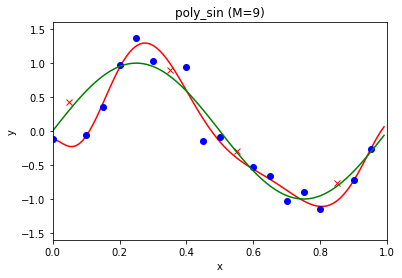

MSE= 0.12689691101927805
[ 1  2  3  4  5  6  7  8  9 10 11 12 15 17 18 19] [ 0 13 14 16]
[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.75 0.85
 0.9  0.95]
[ 0.4216903  -0.05902115  0.34788761  0.97294398  1.36928     1.03503107
  0.9040696   0.93889174 -0.15099598 -0.08614094 -0.28725137 -0.52542669
 -0.90325455 -0.76532337 -0.72143065 -0.26846168]
W
 [ 2.87487228e+00 -7.53937490e+01  5.76781571e+02 -7.07407803e+02
 -7.63477896e+03  3.71846754e+04 -7.63979641e+04  8.33508766e+04
 -4.73465315e+04  1.10486127e+04]


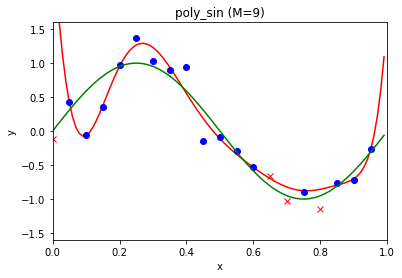

MSE= 2.277927973714228
[ 0  1  2  3  4  6  7  8  9 10 11 13 14 16 17 19] [ 5 12 15 18]
[0.   0.05 0.1  0.15 0.2  0.3  0.35 0.4  0.45 0.5  0.55 0.65 0.7  0.8
 0.85 0.95]
[-0.12190632  0.4216903  -0.05902115  0.34788761  0.97294398  1.03503107
  0.9040696   0.93889174 -0.15099598 -0.08614094 -0.28725137 -0.65429487
 -1.03438087 -1.14677162 -0.76532337 -0.26846168]
W
 [-1.07695595e-01  3.94174045e+01 -1.00299949e+03  1.00410334e+04
 -4.89451915e+04  1.32259792e+05 -2.09220390e+05  1.92853172e+05
 -9.58713487e+04  1.98451404e+04]


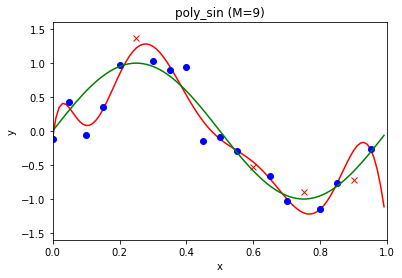

MSE= 0.07775625406546946
CV_MSE[9]=0.539170


In [4]:
from sklearn.model_selection import KFold

search_range = [0,1,2,3,4,5,6,7,8,9]
n_fold = 5

CV_MSE = np.zeros(len(search_range))

for M in search_range:

  kf = KFold(n_splits=n_fold, shuffle=True)
  for train_indx, test_indx in kf.split(x_train):
    print("%s %s" % (train_indx, test_indx))
    x_train_cv = x_train[train_indx]
    y_train_cv = y_train[train_indx]
    x_test_cv = x_train[test_indx]
    y_test_cv = y_train[test_indx]

    print(x_train_cv)
    print(y_train_cv)

    W = E(x_train_cv, y_train_cv, M)
    print('W\n', W)

    y_estimate_cv = [y(x, W, M) for x in x_test_cv]

    y_estimate = [y(x, W, M) for x in x_real]

    plt.plot(x_real, y_estimate, 'r-')
    plt.plot(x_train_cv, y_train_cv, 'bo')
    plt.plot(x_test_cv, y_test_cv, 'rx') 
    plt.plot(x_real, y_real, 'g-')
    plt.xlim(0.0, 1.0)
    plt.ylim(-1.6, 1.6)
    plt.title("poly_sin (M=%s)" % M)
    plt.xlabel('x')
    plt.ylabel('y')
#    plt.savefig('poly_sin_%d.eps' % M)
    plt.show()
    plt.close()


    mse = (np.square(y_test_cv - y_estimate_cv)).mean()
    print('MSE=', mse)

    CV_MSE[M] += mse

  CV_MSE[M]=CV_MSE[M]/n_fold

  print('CV_MSE[%d]=%f'% (M, CV_MSE[M]))



CV_MSE
 [ 0.51608408  0.26517351  0.47703925  0.06680388  0.05859148  0.09088967
  0.09588262  0.15547405  0.9198059  14.00661151]
The best order of the model is 5


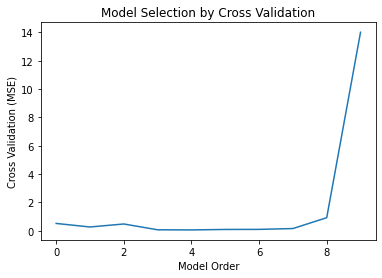

In [5]:
print('CV_MSE\n', CV_MSE)
print('The best order of the model is %d' % (np.argmin(CV_MSE)+1))

plt.plot(CV_MSE)
plt.title("Model Selection by Cross Validation")
plt.xlabel('Model Order')
plt.ylabel('Cross Validation (MSE)')
plt.savefig('poly_sin_cvMSE.eps')
plt.show()
plt.close()
